In [492]:
import pandas as pd

In [493]:
# Display all columns
#pd.set_option("display.max_columns", None) 
# display all rows
#pd.set_option("display.max_rows", None)

In [494]:
data = pd.read_csv("/home/marwane/mlops-projects/morocco-appartements-price/moroccan-houses-price-dataset.csv") 
data = data.drop(["description"], axis=1)

In [495]:
data.isna().sum()

price                      214
surface                      0
piece                      700
rooms                     1763
bathroom                  2466
address                    214
type_de_bien               214
etat                      1976
état                      7586
étage_du_bien             4558
standing                  7649
etat_du_bien              3848
orientation               5519
type_du_sol               4516
surface_habitable         8113
surface_extérieure        8153
type_de_terrain           8172
constructibilité          8177
statut_du_terrain         8186
surface_de_la_parcelle    8173
nombre_d'étages           8177
ascenseur                    0
sécurité                     0
cuisine_équipée              0
four                         0
jardin                       0
terrasse                     0
garage                       0
piscine                      0
salon_marocain               0
salon_européen               0
antenne_parabolique          0
chauffag

In [496]:
for col_name in data.columns[2:]:
    print(data[col_name].value_counts()) #value_counts()

piece
3 Pièces              1270
4 Pièces              1186
5 Pièces               765
1 Salle de bain        756
2 Pièces               729
1 Pièce                601
6 Pièces               360
7 Pièces               299
3 Chambres             284
8 Pièces               216
2 Chambres             192
2 Salles de bains      173
10 Pièces              111
4 Chambres             102
9 Pièces                82
1 Chambre               66
3 Salles de bains       44
5 Chambres              39
4 Salles de bains       38
12 Pièces               35
11 Pièces               24
14 Pièces               15
15 Pièces               13
6 Chambres              13
5 Salles de bains       12
6 Salles de bains        9
7 Chambres               8
13 Pièces                8
8 Chambres               4
20 Pièces                4
9 Chambres               2
24 Pièces                2
17 Pièces                2
8 Salles de bains        2
18 Pièces                2
27 Pièces                2
10 Chambres           

In [497]:
data["price"].isna().sum()

np.int64(214)

In [498]:
# Drop "nan" from price column
data = data[data['price'].notna()]
data.isna().sum()

price                        0
surface                      0
piece                      685
rooms                     1735
bathroom                  2432
address                      0
type_de_bien                 0
etat                      1762
état                      7372
étage_du_bien             4344
standing                  7435
etat_du_bien              3634
orientation               5305
type_du_sol               4302
surface_habitable         7899
surface_extérieure        7939
type_de_terrain           7958
constructibilité          7963
statut_du_terrain         7972
surface_de_la_parcelle    7959
nombre_d'étages           7963
ascenseur                    0
sécurité                     0
cuisine_équipée              0
four                         0
jardin                       0
terrasse                     0
garage                       0
piscine                      0
salon_marocain               0
salon_européen               0
antenne_parabolique          0
chauffag

### Delete column with big number of "nan" values

For this features piece, rooms and bathroom we will replace nan with 0:
- piece not exist means number of piece equal to 0
- bathroom not exist means number of bathroom equal to 0 
- rooms not exist means number of rooms equal to 0


In [499]:
data.shape

(7980, 47)

In [500]:
data.shape

(7980, 47)

## Clean dataset

In [501]:
import re 


def clean_column(value):
    try:
        value = re.sub("[^0-9]","", value)#.replace("DH", "") 
    except:
        value = "NaN"
    return value

data["price"] = data["price"].apply(clean_column)
data["piece"] = data["piece"].apply(clean_column)
data["rooms"] = data["rooms"].apply(clean_column)
data["bathroom"] = data["bathroom"].apply(clean_column) 
data["surface"] = data["surface"].apply(clean_column)   
data["étage_du_bien"] = data["étage_du_bien"].apply(clean_column)   
data["surface_habitable"] = data["surface_habitable"].apply(clean_column)
data["surface_extérieure"] = data["surface_extérieure"].apply(clean_column)
data["surface_de_la_parcelle"] = data["surface_de_la_parcelle"].apply(clean_column)

data.head(2)

,price,surface,piece,rooms,bathroom,address,type_de_bien,etat,état,étage_du_bien,...,porte_blindée,réfrigérateur,machine_à_laver,micro_ondes,chambre_rangement,façade_extérieure,vue_sur_mer,meublé,vue_sur_les_montagnes,entre_seul
0,1062700,112,3,2,1,Sidi Maarouf à Casablanca,Appartement,Nouveau,Finalisé,NaN,...,0,0,0,0,0,0,0,0,0,0
1,913100,60,1,NaN,NaN,Hay Hassani à Casablanca,Bureau,Nouveau,En cours de construction,8,...,0,0,0,0,0,0,0,0,0,0


### Convert str data into float data

In [502]:
def to_int(value):
    if value not in ["NaN", ""]:
        converted_value = float(value)
    else:
        converted_value = float('nan')
    return converted_value

data["price"] = data["price"].apply(to_int)
data["surface"] = data["surface"].apply(to_int)
data["piece"] = data["piece"].apply(to_int)
data["rooms"] = data["rooms"].apply(to_int)
data["bathroom"] = data["bathroom"].apply(to_int)
data["étage_du_bien"] = data["étage_du_bien"].apply(to_int)
data["surface_habitable"] = data["surface_habitable"].apply(to_int)
data["surface_extérieure"] = data["surface_extérieure"].apply(to_int)
data["surface_de_la_parcelle"] = data["surface_de_la_parcelle"].apply(to_int)
data.head(3)

,price,surface,piece,rooms,bathroom,address,type_de_bien,etat,état,étage_du_bien,...,porte_blindée,réfrigérateur,machine_à_laver,micro_ondes,chambre_rangement,façade_extérieure,vue_sur_mer,meublé,vue_sur_les_montagnes,entre_seul
0,1062700.0,112.0,3.0,2.0,1.0,Sidi Maarouf à Casablanca,Appartement,Nouveau,Finalisé,NaN,...,0,0,0,0,0,0,0,0,0,0
1,913100.0,60.0,1.0,NaN,NaN,Hay Hassani à Casablanca,Bureau,Nouveau,En cours de construction,8.0,...,0,0,0,0,0,0,0,0,0,0
2,894400.0,71.0,3.0,2.0,2.0,Aïn Sebaâ à Casablanca,Appartement,Nouveau,Finalisé,NaN,...,0,0,0,0,0,0,0,0,0,0


In [503]:
data.shape

(7980, 47)

In [504]:
data.isnull().sum()

price                      784
surface                      0
piece                      685
rooms                     1735
bathroom                  2432
address                      0
type_de_bien                 0
etat                      1762
état                      7372
étage_du_bien             4344
standing                  7435
etat_du_bien              3634
orientation               5305
type_du_sol               4302
surface_habitable         7899
surface_extérieure        7939
type_de_terrain           7958
constructibilité          7963
statut_du_terrain         7972
surface_de_la_parcelle    7959
nombre_d'étages           7963
ascenseur                    0
sécurité                     0
cuisine_équipée              0
four                         0
jardin                       0
terrasse                     0
garage                       0
piscine                      0
salon_marocain               0
salon_européen               0
antenne_parabolique          0
chauffag

In [505]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7980 entries, 0 to 8193
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   7196 non-null   float64
 1   surface                 7980 non-null   float64
 2   piece                   7295 non-null   float64
 3   rooms                   6245 non-null   float64
 4   bathroom                5548 non-null   float64
 5   address                 7980 non-null   object 
 6   type_de_bien            7980 non-null   object 
 7   etat                    6218 non-null   object 
 8   état                    608 non-null    object 
 9   étage_du_bien           3636 non-null   float64
 10  standing                545 non-null    object 
 11  etat_du_bien            4346 non-null   object 
 12  orientation             2675 non-null   object 
 13  type_du_sol             3678 non-null   object 
 14  surface_habitable       81 non-null     float

In [506]:
data.duplicated().sum()

np.int64(108)

In [507]:
# categorical features
cat_columns = data.columns[data.dtypes=="object"]

# numerical features
num_columns = data.columns[data.dtypes!="object"]

In [508]:
data[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7980 entries, 0 to 8193
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   7196 non-null   float64
 1   surface                 7980 non-null   float64
 2   piece                   7295 non-null   float64
 3   rooms                   6245 non-null   float64
 4   bathroom                5548 non-null   float64
 5   étage_du_bien           3636 non-null   float64
 6   surface_habitable       81 non-null     float64
 7   surface_extérieure      41 non-null     float64
 8   surface_de_la_parcelle  21 non-null     float64
 9   nombre_d'étages         17 non-null     float64
 10  ascenseur               7980 non-null   int64  
 11  sécurité                7980 non-null   int64  
 12  cuisine_équipée         7980 non-null   int64  
 13  four                    7980 non-null   int64  
 14  jardin                  7980 non-null   int64

In [509]:
data[cat_columns].head()

,address,type_de_bien,etat,état,standing,etat_du_bien,orientation,type_du_sol,type_de_terrain,constructibilité,statut_du_terrain
0,Sidi Maarouf à Casablanca,Appartement,Nouveau,Finalisé,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hay Hassani à Casablanca,Bureau,Nouveau,En cours de construction,Moyen standing,NaN,NaN,NaN,NaN,NaN,NaN
2,Aïn Sebaâ à Casablanca,Appartement,Nouveau,Finalisé,Moyen standing,NaN,NaN,NaN,NaN,NaN,NaN
3,Anfa Supérieur à Casablanca,Villa,À rénover,NaN,NaN,Moins d'un an,NaN,NaN,NaN,NaN,NaN
4,Mers Sultan à Casablanca,Appartement,Bon état,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [510]:
for col_name in cat_columns:
    print(data[col_name].value_counts())
    print(f"Numbers of categories: {len(data[col_name].value_counts())}")
    print("================================================")

address
Californie à Casablanca     463
Racine à Casablanca         338
Oulfa à Casablanca          334
Ain Diab à Casablanca       287
Aïn Sebaâ à Casablanca      283
                           ... 
Hay Rmila à Casablanca        1
Hay Adil à Casablanca         1
Hay Laalou à Casablanca       1
Ifriquia à Casablanca         1
Bin Lamdoun à Casablanca      1
Name: count, Length: 185, dtype: int64
Numbers of categories: 185
type_de_bien
Appartement         4974
Villa               1037
Local commercial     704
Terrain              547
Bureau               395
Maison               294
Logement              14
Riad                  11
Ferme                  4
Name: count, dtype: int64
Numbers of categories: 9
etat
Bon état     4088
Nouveau      1783
À rénover     347
Name: count, dtype: int64
Numbers of categories: 3
état
Finalisé                    402
En cours de construction    206
Name: count, dtype: int64
Numbers of categories: 2
standing
Haut standing     363
Moyen standing    166
Éc

In [511]:
data["nombre_d'étages"].value_counts()

nombre_d'étages
2.0    7
1.0    7
3.0    2
4.0    1
Name: count, dtype: int64

In [512]:
#data[num_columns].corr()

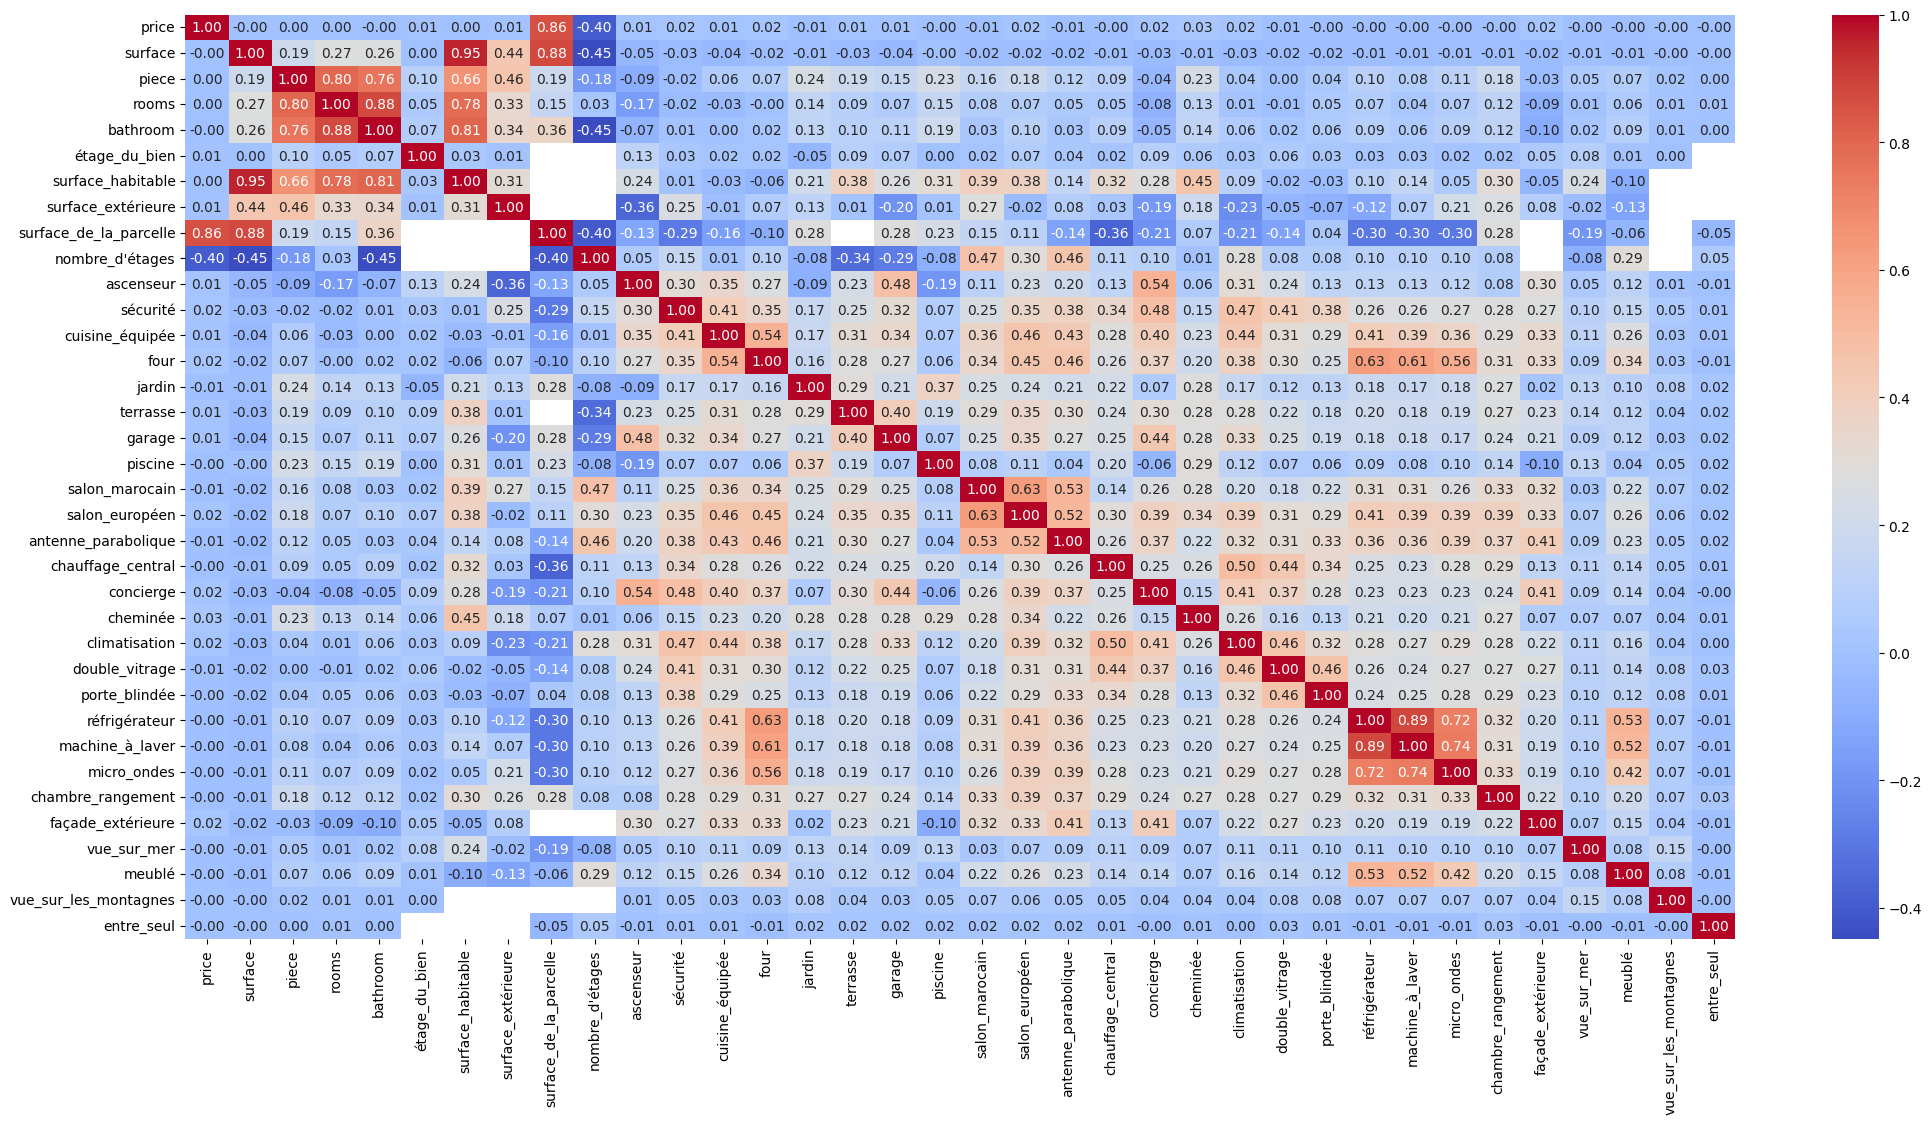

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Adjust figure size
plt.figure(figsize=(25, 12))  # Adjust the size (width, height) of the plot

# Create the heatmap
sns.heatmap(data[num_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [514]:
col_name="surface_de_la_parcelle"
data[["price", col_name]].corr()["price"].to_list()[1]

0.8596126279462812

In [515]:
best_num_features = []
for col_name in num_columns.tolist():
    cor = data[["price", col_name]].corr().iloc[0, 1]  # Extract the correlation between 'price' and 'col_name'
    #cor = data[["price", col_name]].corr()["price"].to_list()[1]

    if abs(cor) > 0.01:  # Assuming you want the absolute correlation to be greater than 0.004
        best_num_features.append(col_name)

best_num_features

['price',
 'surface_de_la_parcelle',
 "nombre_d'étages",
 'ascenseur',
 'sécurité',
 'cuisine_équipée',
 'four',
 'terrasse',
 'garage',
 'salon_européen',
 'concierge',
 'cheminée',
 'climatisation',
 'façade_extérieure']

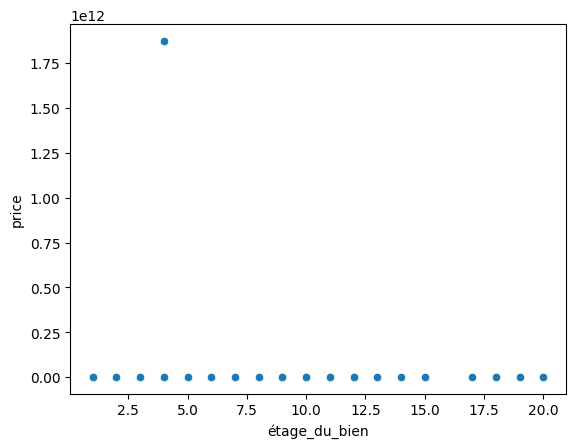

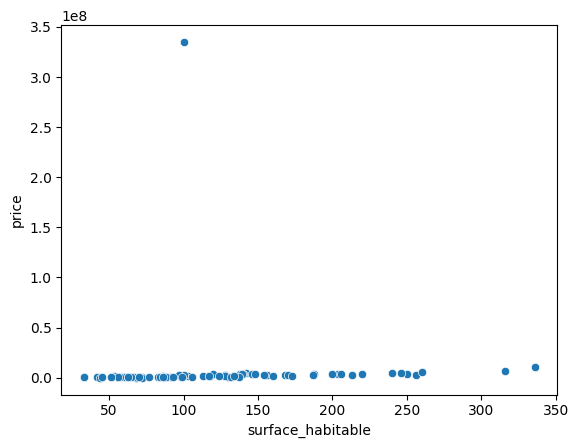

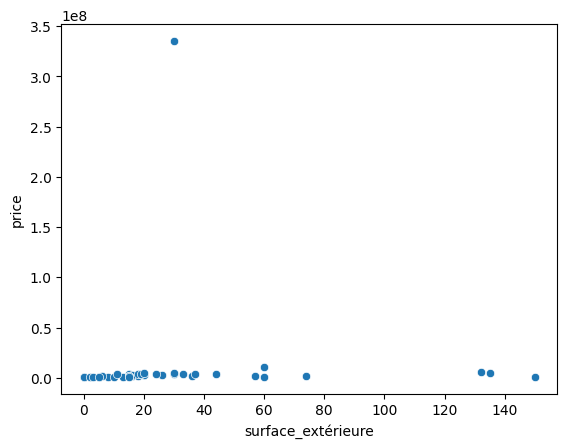

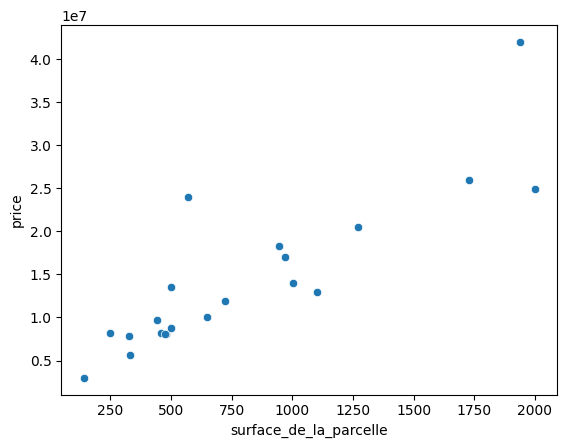

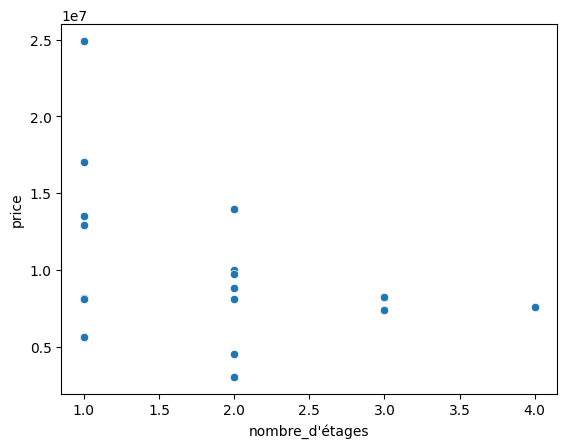

In [516]:
for col_name in num_columns[5:10]:
    sns.scatterplot(data=data, x=col_name, y="price",)
    print("\n")
    plt.show()

## Features Engineering

In [517]:
data[cat_columns].head(3)

,address,type_de_bien,etat,état,standing,etat_du_bien,orientation,type_du_sol,type_de_terrain,constructibilité,statut_du_terrain
0,Sidi Maarouf à Casablanca,Appartement,Nouveau,Finalisé,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hay Hassani à Casablanca,Bureau,Nouveau,En cours de construction,Moyen standing,NaN,NaN,NaN,NaN,NaN,NaN
2,Aïn Sebaâ à Casablanca,Appartement,Nouveau,Finalisé,Moyen standing,NaN,NaN,NaN,NaN,NaN,NaN


### Hardest work will start

In [518]:
data[cat_columns].columns

Index(['address', 'type_de_bien', 'etat', 'état', 'standing', 'etat_du_bien',
       'orientation', 'type_du_sol', 'type_de_terrain', 'constructibilité',
       'statut_du_terrain'],
      dtype='object')

In [519]:
address_map = {
    "Californie à Casablanca", "Ain Diab à Casablanca", "Ain Diab Extension à Casablanca", "Aïn Sebaâ à Casablanca", 
    "Racine à Casablanca", "Oulfa à Casablanca",
}

In [520]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocessing for categorical columns
categorical_features = ['address', 'type_de_bien', 'etat', 'état', 'standing', 'orientation']
categorical_transformer = Pipeline(steps=[
    ('encoder', LabelEncoder())  # Or use OneHotEncoder for one-hot encoding
])

# Apply transformers to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline (example with a linear regression model)
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

data1 = data.copy()


In [521]:
data["address"].value_counts() 

address
Californie à Casablanca     463
Racine à Casablanca         338
Oulfa à Casablanca          334
Ain Diab à Casablanca       287
Aïn Sebaâ à Casablanca      283
                           ... 
Hay Rmila à Casablanca        1
Hay Adil à Casablanca         1
Hay Laalou à Casablanca       1
Ifriquia à Casablanca         1
Bin Lamdoun à Casablanca      1
Name: count, Length: 185, dtype: int64

In [522]:
data["type_de_bien"].value_counts() 

type_de_bien
Appartement         4974
Villa               1037
Local commercial     704
Terrain              547
Bureau               395
Maison               294
Logement              14
Riad                  11
Ferme                  4
Name: count, dtype: int64

In [523]:
type_de_bien_map = {"Appartement":1, "Terrain":2, "Bureau":3, "Maison":4, "Logement":5, "Local commercial":6, "Ferme":7, "Villa":8, "Riad":9}

In [524]:
data["etat"].value_counts() 

etat
Bon état     4088
Nouveau      1783
À rénover     347
Name: count, dtype: int64

In [525]:
# NaN  take 0
etat_map = { "À rénover":1, "Bon état":2, "Nouveau":3}

In [526]:
data["état"].value_counts()

état
Finalisé                    402
En cours de construction    206
Name: count, dtype: int64

In [527]:
état_map = {"Finalisé":0, "En cours de construction":1} # NaN

In [528]:
data["standing"].value_counts()

standing
Haut standing     363
Moyen standing    166
Économique         16
Name: count, dtype: int64

In [529]:
standing_map = {"Haut standing":3, "Moyen standing":2, "Économique":1}

In [530]:
data["etat_du_bien"].value_counts()

etat_du_bien
10-20 ans          1336
5-10 ans            993
1-5 ans             707
Moins d'un an       627
20-30 ans           502
30-50 ans           136
50-70 ans            35
70-100 ans            7
Plus de 100 ans       3
Name: count, dtype: int64

In [531]:
etat_du_bien_map = {"Moins d'un an":9,"1-5 ans":8, "5-10 ans":7, "10-20 ans":6, "20-30 ans":5,"30-50 ans":4, "50-70 ans":3, "70-100 ans":2, "Plus de 100 ans":1}

In [532]:
data["orientation"].value_counts()

orientation
Sud      1320
Ouest     631
Est       463
Nord      261
Name: count, dtype: int64

In [533]:
orientation_map = {"Sud":2, "Est":3, "Ouest":1, "Nord":4}

In [534]:
data["type_du_sol"].value_counts()

type_du_sol
Marbre       2062
Carrelage    1324
Parquet       292
Name: count, dtype: int64

In [535]:
type_du_sol_map = {"Marbre":3, "Carrelage":1, "Parquet":2}

In [536]:
data["type_de_terrain"].value_counts()


type_de_terrain
Lots de villa                          8
Groupement d'habitation                7
Commercial                             5
Industriel                             1
Commercial, Groupement d'habitation    1
Name: count, dtype: int64

In [537]:
type_de_terrain_map = {"Lots de villa":5, "Industriel":4, "Groupement d'habitation":3, "Commercial, Groupement d'habitation":2, "Commercial":1}

In [538]:
data["constructibilité"].value_counts()

constructibilité
R+1    6
R+3    5
R+5    3
R+4    2
R+7    1
Name: count, dtype: int64

In [539]:
# Not important
constructibilite_map = {"R+1":1, "R+3":2, "R+5":3, "R+4":4, "R+7":5}

In [540]:
data["statut_du_terrain"].value_counts() 

statut_du_terrain
Loti        6
Non loti    2
Name: count, dtype: int64

In [541]:
# Not important
statut_du_terrain_map = {"Loti":2, "Non loti":1}

In [542]:
# Ordinal encoding based on data description 
type_de_bien_map = {"Appartement":1, "Terrain":2, "Bureau":3, "Maison":4, "Logement":5, "Local commercial":6, "Ferme":7, "Villa":8, "Riad":9}
etat_map = { "À rénover":1, "Bon état":2, "Nouveau":3}
état_map = {"Finalisé":0, "En cours de construction":1} # NaN
standing_map = {"Haut standing":3, "Moyen standing":2, "Économique":1}
etat_du_bien_map = {"Moins d'un an":9,"1-5 ans":8, "5-10 ans":7, "10-20 ans":6, "20-30 ans":5,"30-50 ans":4, "50-70 ans":3, "70-100 ans":2, "Plus de 100 ans":1}
orientation_map = {"Sud":2, "Est":3, "Ouest":1, "Nord":4}
type_du_sol_map = {"Marbre":3, "Carrelage":1, "Parquet":2}
type_de_terrain_map = {"Lots de villa":5, "Industriel":4, "Groupement d'habitation":3, "Commercial, Groupement d'habitation":2, "Commercial":1}
statut_du_terrain_map = {"Loti":2, "Non loti":1}
constructibilite_map = {"R+1":1, "R+3":2, "R+5":3, "R+4":4, "R+7":5}

cat_col__encoder = [type_de_bien_map, etat_map, état_map, standing_map, etat_du_bien_map, orientation_map, type_du_sol_map,
type_de_terrain_map, statut_du_terrain_map, constructibilite_map]

In [543]:
for col_name, col_map in zip(data[cat_columns].columns[1:], cat_col__encoder):
    if col_name != "address":
        data[col_name] = data[col_name].map(col_map)

data.head(10)

,price,surface,piece,rooms,bathroom,address,type_de_bien,etat,état,étage_du_bien,...,porte_blindée,réfrigérateur,machine_à_laver,micro_ondes,chambre_rangement,façade_extérieure,vue_sur_mer,meublé,vue_sur_les_montagnes,entre_seul
0,1062700.0,112.0,3.0,2.0,1.0,Sidi Maarouf à Casablanca,1,3.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,913100.0,60.0,1.0,NaN,NaN,Hay Hassani à Casablanca,3,3.0,1.0,8.0,...,0,0,0,0,0,0,0,0,0,0
2,894400.0,71.0,3.0,2.0,2.0,Aïn Sebaâ à Casablanca,1,3.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,45000000.0,2500.0,7.0,5.0,4.0,Anfa Supérieur à Casablanca,8,1.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2500000.0,176.0,5.0,3.0,3.0,Mers Sultan à Casablanca,1,2.0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
5,1159160.0,119.0,3.0,2.0,1.0,Sidi Maarouf à Casablanca,1,3.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
6,1458000.0,118.0,3.0,2.0,1.0,Sidi Maarouf à Casablanca,1,3.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
7,1212000.0,53.0,2.0,1.0,1.0,Riviera à Casablanca,1,3.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
8,10500000.0,557.0,6.0,5.0,4.0,CIL (Hay Salam) à Casablanca,8,2.0,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
9,4400000.0,169.0,3.0,2.0,2.0,Anfa à Casablanca,1,3.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [544]:
data = data[data['price'].notna()]
data.isna().sum() 

price                        0
surface                      0
piece                      577
rooms                     1459
bathroom                  2148
address                      0
type_de_bien                 0
etat                      1649
état                      6595
étage_du_bien             3862
standing                  6651
etat_du_bien              3357
orientation               4763
type_du_sol               3850
surface_habitable         7117
surface_extérieure        7156
type_de_terrain           7174
constructibilité          7196
statut_du_terrain         7196
surface_de_la_parcelle    7175
nombre_d'étages           7179
ascenseur                    0
sécurité                     0
cuisine_équipée              0
four                         0
jardin                       0
terrasse                     0
garage                       0
piscine                      0
salon_marocain               0
salon_européen               0
antenne_parabolique          0
chauffag

In [571]:
for col_name in ["piece", "rooms", "bathroom", "étage_du_bien", "surface_habitable", "surface_extérieure", "statut_du_terrain", "surface_de_la_parcelle", "type_de_bien",
                 "etat","état", "standing", "etat_du_bien", "orientation", "type_du_sol", "type_de_terrain", "constructibilité", "nombre_d'étages"]:
    data[col_name].replace("NaN", 0).fillna(0)
    #data[col_name] = data[col_name]

data.isna().sum()

price                        0
surface                      0
piece                        0
rooms                        0
bathroom                     0
address                      0
type_de_bien                 0
etat                      1649
état                      6595
étage_du_bien                0
standing                  6651
etat_du_bien              3357
orientation               4763
type_du_sol               3850
surface_habitable            0
surface_extérieure           0
type_de_terrain           7174
constructibilité          7196
statut_du_terrain            0
surface_de_la_parcelle       0
nombre_d'étages           7179
ascenseur                    0
sécurité                     0
cuisine_équipée              0
four                         0
jardin                       0
terrasse                     0
garage                       0
piscine                      0
salon_marocain               0
salon_européen               0
antenne_parabolique          0
chauffag

In [582]:
#data = data.drop(["addess"], axis=1)
# Define the threshold as the percentage of missing values (e.g., 50% NaN)
threshold = 0.2  # Columns with more than 50% NaN will be dropped

# Calculate the percentage of NaN values per column
missing_percentage = data.isna().mean()

# Drop columns where NaN percentage is greater than the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)

columns_to_drop = missing_percentage[missing_percentage > threshold].index
data_cleaned = data.drop(columns=columns_to_drop)

In [583]:
data_cleaned.isna().sum()

price                     0
surface                   0
piece                     0
rooms                     0
bathroom                  0
address                   0
type_de_bien              0
étage_du_bien             0
surface_habitable         0
surface_extérieure        0
statut_du_terrain         0
surface_de_la_parcelle    0
ascenseur                 0
sécurité                  0
cuisine_équipée           0
four                      0
jardin                    0
terrasse                  0
garage                    0
piscine                   0
salon_marocain            0
salon_européen            0
antenne_parabolique       0
chauffage_central         0
concierge                 0
cheminée                  0
climatisation             0
double_vitrage            0
porte_blindée             0
réfrigérateur             0
machine_à_laver           0
micro_ondes               0
chambre_rangement         0
façade_extérieure         0
vue_sur_mer               0
meublé              

In [584]:
data = data_cleaned.copy()

In [585]:
data[cat_columns].shape

KeyError: "['etat', 'état', 'standing', 'etat_du_bien', 'orientation', 'type_du_sol', 'type_de_terrain', 'constructibilité'] not in index"

In [547]:
data[num_columns].shape 

(7196, 36)

In [586]:
data.dtypes

price                     float64
surface                   float64
piece                     float64
rooms                     float64
bathroom                  float64
address                    object
type_de_bien                int64
étage_du_bien             float64
surface_habitable         float64
surface_extérieure        float64
statut_du_terrain         float64
surface_de_la_parcelle    float64
ascenseur                   int64
sécurité                    int64
cuisine_équipée             int64
four                        int64
jardin                      int64
terrasse                    int64
garage                      int64
piscine                     int64
salon_marocain              int64
salon_européen              int64
antenne_parabolique         int64
chauffage_central           int64
concierge                   int64
cheminée                    int64
climatisation               int64
double_vitrage              int64
porte_blindée               int64
réfrigérateur 

## Imputing

### We repace NaN with 0 thiese columns : piece	rooms	bathroom

In [549]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [587]:
X = data.drop(["price", "address"], axis=1)
y = data["price"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [588]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preprocessing for categorical columns
categorical_features = ['address', 'type_de_bien', 'etat', 'état', 'standing', 'orientation']
categorical_transformer = Pipeline(steps=[
    ('encoder', LabelEncoder())  # Or use OneHotEncoder for one-hot encoding
])

# Apply transformers to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Model pipeline (example with a linear regression model)
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

 


In [589]:
num_pipeline = Pipeline(
    steps = [
        ("imputer", SimpleImputer()), # constant or most fequency
        ("scaler", StandardScaler())
    ]
)

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [590]:
cat_pipeline = Pipeline(
    steps= [
        ('imputer', SimpleImputer()),
        ("ordinalencoder", OrdinalEncoder())
    ]
)

In [591]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline", num_pipeline, num_cols),
        ("cat_pipeline", cat_pipeline, cat_cols)
    ]
)

In [592]:
data.isna().sum()

price                     0
surface                   0
piece                     0
rooms                     0
bathroom                  0
address                   0
type_de_bien              0
étage_du_bien             0
surface_habitable         0
surface_extérieure        0
statut_du_terrain         0
surface_de_la_parcelle    0
ascenseur                 0
sécurité                  0
cuisine_équipée           0
four                      0
jardin                    0
terrasse                  0
garage                    0
piscine                   0
salon_marocain            0
salon_européen            0
antenne_parabolique       0
chauffage_central         0
concierge                 0
cheminée                  0
climatisation             0
double_vitrage            0
porte_blindée             0
réfrigérateur             0
machine_à_laver           0
micro_ondes               0
chambre_rangement         0
façade_extérieure         0
vue_sur_mer               0
meublé              

## Model Building

In [594]:

data = data.reset_index(drop=True)
print(data.shape)
X = data.drop(["price"], axis=1)
y = data["price"]

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

(7196, 38)


In [595]:
X_test.shape

(181, 5)

In [560]:
data[num_columns].corr()

,price,surface,piece,rooms,bathroom,étage_du_bien,surface_habitable,surface_extérieure,surface_de_la_parcelle,nombre_d'étages,...,porte_blindée,réfrigérateur,machine_à_laver,micro_ondes,chambre_rangement,façade_extérieure,vue_sur_mer,meublé,vue_sur_les_montagnes,entre_seul
price,1.000000,-0.000943,0.002265,0.003706,0.002564,0.013781,-0.001084,-0.000562,-0.000501,-0.395837,...,-0.004712,-0.003987,-0.003895,-0.003495,-0.004886,0.024929,-0.002015,-0.003401,-0.000772,-0.000190
surface,-0.000943,1.000000,-0.057061,-0.051555,-0.040285,-0.067147,-0.008070,-0.003950,0.004151,-0.447617,...,-0.027814,-0.022434,-0.022607,-0.018371,-0.008972,-0.046871,-0.009740,-0.022304,-0.003196,-0.000710
piece,0.002265,-0.057061,1.000000,0.781522,0.732082,-0.027308,0.018675,0.020060,0.049814,-0.177260,...,0.072605,0.123667,0.103247,0.130236,0.222554,0.024278,0.068745,0.082229,0.028229,0.011672
rooms,0.003706,-0.051555,0.781522,1.000000,0.852226,-0.013700,0.023605,0.013434,0.036755,0.026631,...,0.066694,0.132006,0.113426,0.136204,0.175535,0.042102,0.049874,0.102790,0.025890,0.012425
bathroom,0.002564,-0.040285,0.732082,0.852226,1.000000,-0.021512,0.032790,0.021122,0.051652,-0.447871,...,0.112244,0.174590,0.158885,0.180973,0.215803,0.068463,0.073086,0.121767,0.031324,0.007802
étage_du_bien,0.013781,-0.067147,-0.027308,-0.013700,-0.021512,1.000000,0.072834,0.042285,-0.031396,NaN,...,0.116130,0.116182,0.119954,0.091160,0.066761,0.327200,0.047653,0.080821,0.017752,-0.011616
surface_habitable,-0.001084,-0.008070,0.018675,0.023605,0.032790,0.072834,1.000000,0.550573,-0.004168,NaN,...,0.014466,0.027280,0.028043,0.009513,0.039478,0.038347,0.045063,0.000518,-0.006083,-0.001542
surface_extérieure,-0.000562,-0.003950,0.020060,0.013434,0.021122,0.042285,0.550573,1.000000,-0.002203,NaN,...,0.025549,0.011279,0.032199,0.033137,0.031577,0.032751,0.024971,0.000868,-0.003216,-0.000815
surface_de_la_parcelle,-0.000501,0.004151,0.049814,0.036755,0.051652,-0.031396,-0.004168,-0.002203,1.000000,-0.555483,...,0.014492,-0.004440,-0.003875,-0.001367,0.041132,-0.021260,0.007792,-0.006433,-0.002964,0.231805
nombre_d'étages,-0.395837,-0.447617,-0.177260,0.026631,-0.447871,NaN,NaN,NaN,-0.555483,1.000000,...,0.075235,0.095378,0.095378,0.095378,0.075235,NaN,-0.084781,0.288403,NaN,0.051510


In [621]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from  sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import numpy as np


"""df1 = data[num_columns].copy()
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
data = data[['price', 'surface', 'piece', 'rooms', 'bathroom',   'état' ]].copy()
df1 = df1.dropna()"""
data = data.reset_index(drop=True)
print(data.shape)
#data = data.drop(["address"], axis=1)

X = data.drop(["price"], axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)
X_train = np.array(X_train)
y_train = np.array(y_train)

model = Pipeline(steps=[ 
    ('scaler', StandardScaler()),
    ('regressor',RandomForestRegressor())
])

#model = LinearRegression()
model.fit(X_train, y_train) 

print("train:", model.score(X_train, y_train))
print("TEst:", model.score(X_test, y_test))

(7196, 37)
train: 0.8851677671175845
TEst: -11025786.696082411


/home/marwane/mlops-projects/morocco-appartements-price/morocco/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [602]:
data.dtypes

price                     float64
surface                   float64
piece                     float64
rooms                     float64
bathroom                  float64
type_de_bien                int64
étage_du_bien             float64
surface_habitable         float64
surface_extérieure        float64
statut_du_terrain         float64
surface_de_la_parcelle    float64
ascenseur                   int64
sécurité                    int64
cuisine_équipée             int64
four                        int64
jardin                      int64
terrasse                    int64
garage                      int64
piscine                     int64
salon_marocain              int64
salon_européen              int64
antenne_parabolique         int64
chauffage_central           int64
concierge                   int64
cheminée                    int64
climatisation               int64
double_vitrage              int64
porte_blindée               int64
réfrigérateur               int64
machine_à_lave

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

"""# Preprocessing for categorical columns
categorical_features = ['address', 'type_de_bien', 'etat', 'état', 'standing', 'orientation']
categorical_transformer = Pipeline(steps=[
    ('encoder', LabelEncoder())  # Or use OneHotEncoder for one-hot encoding
])

# Apply transformers to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])
"""
# Model pipeline (example with a linear regression model)
from sklearn.linear_model import LinearRegression

"""model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])"""

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_train, y_train) 

0.00718405205769046

In [567]:
data["rooms"].isnull().sum()

np.int64(0)

In [568]:
for col_name in data.columns:
    print(data[col_name].value_counts())

price
1200000.0     105
1500000.0     100
1400000.0      98
1800000.0      90
1100000.0      89
             ... 
10490000.0      1
36943500.0      1
9635000.0       1
20232000.0      1
23400000.0      1
Name: count, Length: 1239, dtype: int64
surface
100.0     124
60.0       99
120.0      82
50.0       76
80.0       72
         ... 
1762.0      1
658.0       1
2069.0      1
1056.0      1
1063.0      1
Name: count, Length: 926, dtype: int64
piece
3.0     1441
4.0     1225
1.0     1150
2.0      963
5.0      744
0.0      577
6.0      351
7.0      269
8.0      201
10.0      97
9.0       78
12.0      32
11.0      19
14.0      14
15.0      11
13.0       7
20.0       3
24.0       2
17.0       2
50.0       1
34.0       1
26.0       1
27.0       1
69.0       1
48.0       1
16.0       1
35.0       1
22.0       1
78.0       1
Name: count, dtype: int64
rooms
2.0     2054
3.0     1855
0.0     1459
4.0      713
1.0      628
5.0      244
6.0      118
7.0       44
8.0       22
10.0      20
9.0       